In [9]:
import pandas as pd

df = pd.read_excel('data/信用卡交易数据.xlsx')

df.head(5)

,换设备次数,支付失败次数,换IP次数,换IP国次数,交易金额,欺诈标签
0,0,11,3,5,28836,1
1,5,6,1,4,21966,1
2,6,2,0,0,18199,1
3,5,8,2,2,24803,1
4,7,10,5,0,26277,1


In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('欺诈标签', axis=1)

y = df['欺诈标签']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0).fit(X_train, y_train)

lr_y_pred = lr.predict(X_test)

from sklearn.tree import DecisionTreeClassifier

df = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

df_y_pred = df.predict(X_test)


D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import GridSearchCV

lr_param_grid = {'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

df_param_grid = {'max_depth': [3, 4, 5], 'criterion': ['gini', 'entropy']}

lr_cv = GridSearchCV(estimator=lr, param_grid=lr_param_grid, cv=5, scoring='accuracy')

df_cv = GridSearchCV(estimator=df, param_grid=df_param_grid, cv=5, scoring='accuracy')

lr_cv.fit(X_train, y_train)

df_cv.fit(X_train, y_train)

lr_cv_pre = lr_cv.predict(X_test)

df_cv_pre = df_cv.predict(X_test)

lr_acc = accuracy_score(y_test, lr_cv_pre)

df_acc = accuracy_score(y_test, df_cv_pre)

lr_rc = recall_score(y_test, lr_cv_pre, average='macro')

df_rc = recall_score(y_test, df_cv_pre, average='macro')

print(lr_acc, df_acc)

print(lr_rc, df_rc)


D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

0.7151515151515152 0.9030303030303031
0.6997150997150997 0.8814814814814815


D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent ca

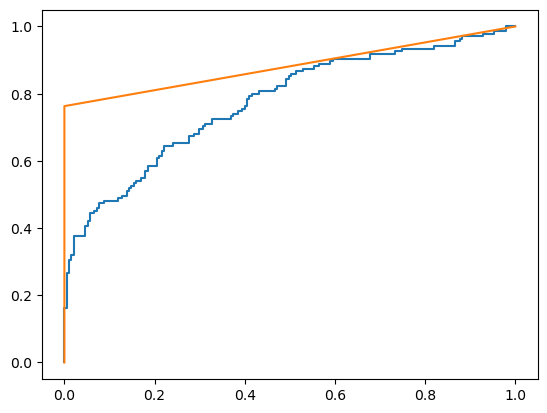

In [23]:
from sklearn.metrics import roc_curve, precision_recall_curve

best_lr = lr_cv.best_estimator_

best_df = df_cv.best_estimator_

best_lr_pre = best_lr.predict_proba(X_test)

best_df_pre = best_df.predict_proba(X_test)

lr_fpr, lr_tpr, _ = roc_curve(y_test, best_lr_pre[:, 1])

df_fpr, df_tpr, _ = roc_curve(y_test, best_df_pre[:, 1])

lr_precision, lr_recall, _ = precision_recall_curve(y_test, best_lr_pre[:, 1])

df_precision, df_recall, _ = precision_recall_curve(y_test, best_df_pre[:, 1])

import matplotlib.pyplot as plt

plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')

plt.plot(df_fpr, df_tpr, label='Decision Tree')

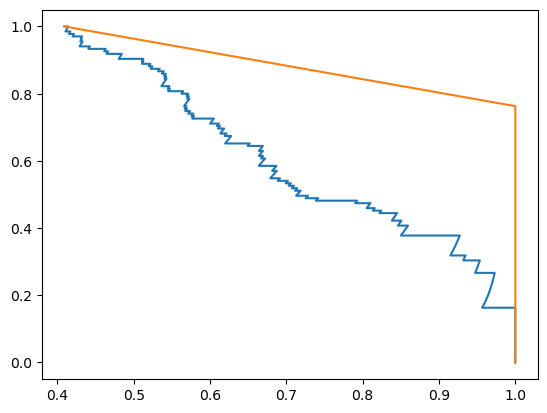

In [24]:
plt.plot(lr_precision, lr_recall, label='Logistic Regression')

plt.plot(df_precision, df_recall, label='Decision Tree')

In [25]:
print(best_lr_pre)

print(best_df_pre)

[[0.11709473 0.88290527]
 [0.96909887 0.03090113]
 [0.84691672 0.15308328]
 [0.86150378 0.13849622]
 [0.7154746  0.2845254 ]
 [0.77588715 0.22411285]
 [0.30730689 0.69269311]
 [0.39506515 0.60493485]
 [0.80713821 0.19286179]
 [0.69892208 0.30107792]
 [0.84975433 0.15024567]
 [0.34757517 0.65242483]
 [0.74887958 0.25112042]
 [0.78390191 0.21609809]
 [0.47026855 0.52973145]
 [0.53600632 0.46399368]
 [0.16127496 0.83872504]
 [0.35957677 0.64042323]
 [0.82917095 0.17082905]
 [0.1941504  0.8058496 ]
 [0.36396138 0.63603862]
 [0.09133105 0.90866895]
 [0.45039132 0.54960868]
 [0.65800936 0.34199064]
 [0.25819015 0.74180985]
 [0.05007266 0.94992734]
 [0.12394305 0.87605695]
 [0.81177076 0.18822924]
 [0.52490972 0.47509028]
 [0.36272462 0.63727538]
 [0.79615118 0.20384882]
 [0.60807099 0.39192901]
 [0.73812886 0.26187114]
 [0.81989245 0.18010755]
 [0.34642613 0.65357387]
 [0.62891978 0.37108022]
 [0.91089376 0.08910624]
 [0.8153271  0.1846729 ]
 [0.87818205 0.12181795]
 [0.35519961 0.64480039]


In [28]:
print(best_lr.coef_)

print(best_df.feature_importances_)

[[ 2.87608431e-01  1.05241830e-01  1.74215812e-03  5.13207627e-01
  -1.18308042e-04]]
[0.38008139 0.22767809 0.06240427 0.32983625 0.        ]
